In [331]:
#データ加工
import pandas as pd
pd.options.display.precision = 1
import numpy as np
pd.get_option("display.max_columns")#pandasで表を省略しない出力
pd.get_option("display.max_rows")#pandasで表を省略しない出力

#グラフ描写
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
#データの読み込み
train = pd.read_csv('集計の練習.csv')#訓練データ読み込み
test = pd.read_csv('test.csv')#テストデータ読みこみ
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,target
0,892,3,male,34.5,0,0,330911,7.8,Q,0
1,893,3,female,47.0,1,1,363272,7.0,S,0
2,894,2,male,62.0,0,0,240276,9.7,Q,1
3,895,3,male,27.0,0,0,315154,8.7,S,1
4,896,3,female,22.0,1,1,3101298,12.3,S,1


In [329]:
train_re = train.loc[:,["target","Age","Fare"]]
train_re.head()

,target,Age,Fare
0,0,34.5,7.8
1,0,47.0,7.0
2,1,62.0,9.7
3,1,27.0,8.7
4,1,22.0,12.3


In [330]:
drop = ["Ticket","Fare","Age","PassengerId","Pclass"]
train = train.drop(drop,axis =1)
train.head()

,Sex,SibSp,Parch,Embarked,target
0,male,0,0,Q,0
1,female,1,1,S,0
2,male,0,0,Q,1
3,male,0,0,S,1
4,female,1,1,S,1


In [316]:
train = pd.get_dummies(train)
drop = ["target"]
train_e = train.drop(drop,axis =1)
train_o = train["target"]

train_e.head()

,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0
1,1,1,1,0,0,0,1
2,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1
4,1,1,1,0,0,0,1


In [317]:
a = train.shape[1]-1
a
table = list(range(a))
table

[0, 1, 2, 3, 4, 5, 6]

In [318]:
cycle = 0
for col in train.columns:
    table[cycle] = pd.crosstab(train[col], train_o,normalize="columns")
    table[cycle] = table[cycle].drop(table[cycle].index[[0]])
    table[cycle] = table[cycle] *100
    cycle = cycle + 1 

IndexError: list assignment index out of range

In [319]:
to = pd.concat(table,axis =0, keys=train_e.columns)
to

,target,0,1
,SibSp,,
SibSp,1,38.1,32.2
Parch,1,38.1,33.1
Sex_female,1,0.0,100.0
Sex_male,1,35.2,37.2
Embarked_C,1,64.8,62.8
Embarked_Q,1,23.3,25.2
Embarked_S,1,14.2,8.7


In [321]:
train_re.head()

,target,Age,Fare
0,0,34.5,7.8
1,0,47.0,7.0
2,1,62.0,9.7
3,1,27.0,8.7
4,1,22.0,12.3


In [325]:
train_re_e = train_re.loc[:,["Age","Fare"]]
train_re_o = train_re["target"]


In [215]:
table = pd.crosstab(train["Embarked"], train["Sex"])
table

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [216]:
x = train["Survived"]
table = pd.crosstab(train["Pclass"],x, )
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [217]:
for col in table.columns:
    for ind in table.index:
        print(table.loc[ind,col])

80
97
372
136
87
119


In [88]:
table.sum()

Survived
0    549
1    342
dtype: int64

In [91]:
for col in table.columns:
    for ind in table.index:
        table.loc[ind,col] = table.loc[ind,col]/table.sum()[col]

In [92]:
table

Survived,0,1
Pclass,,
1,0.107818,0.219418
2,0.157395,0.257951
3,0.790224,0.675377


In [95]:
#複数列に対し、集計を行う。
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [93]:
a

<bound method DataFrame.mean of Survived         0         1
Pclass                      
1         0.323937  0.663740
2         0.472559  0.777134
3         2.369195  2.013166>

In [14]:
#クラス分け
train["Age_class"] = pd.cut(train["Age"],[0,65,70,80],labels=["下","中","上"], right=True)

In [15]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train["Age_class"]

0        下
1        下
2        下
3        下
4        下
5      NaN
6        下
7        下
8        下
9        下
10       下
11       下
12       下
13       下
14       下
15       下
16       下
17     NaN
18       下
19     NaN
20       下
21       下
22       下
23       下
24       下
25       下
26     NaN
27       下
28     NaN
29     NaN
      ... 
861      下
862      下
863    NaN
864      下
865      下
866      下
867      下
868    NaN
869      下
870      下
871      下
872      下
873      下
874      下
875      下
876      下
877      下
878    NaN
879      下
880      下
881      下
882      下
883      下
884      下
885      下
886      下
887      下
888    NaN
889      下
890      下
Name: Age_class, Length: 891, dtype: category
Categories (3, object): [下 < 中 < 上]

In [17]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [4]:
#データ行数の確認
for i in data:
    print(i.shape)

(891, 12)
(418, 11)


In [5]:
#基本統計量の確認
for i in data:
    print(i.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [6]:
#欠損値の検出
for i in data:
    print(i.isnull().sum())
    print(i.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             

In [14]:
a = pd.pivot_table(
    train,
    values = ["Age"],
    index = ["Sex"],
    columns = ["Pclass"],
    aggfunc = ["mean","sem","count"],
    dropna = True
    )
a.to_csv('N数の情報.csv',encoding = 'cp932')
a

mean                             sem                     count  \
              Age                             Age                       Age   
Pclass          1          2          3         1         2         3     1   
Sex                                                                           
female  34.611765  28.722973  21.750000  1.476434  1.496421  1.260454    85   
male    41.281386  30.740707  26.507589  1.506444  1.486842  0.764462   101   

                 
                 
Pclass   2    3  
Sex              
female  74  102  
male    99  253

In [334]:
#Age列が欠損値であるデータの抽出。
train_nan = train.loc[train.Age.isnull(),:]
train_nan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [335]:
#Ageの欠損値をSEXごとの平均値で埋める。
for df in data:
    mean = df.groupby("Sex")["Age"].mean()
    for a in mean.keys():
        df.loc[(df.Age.isnull())&(df.Sex==a),"Age"] = mean[a]

In [363]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


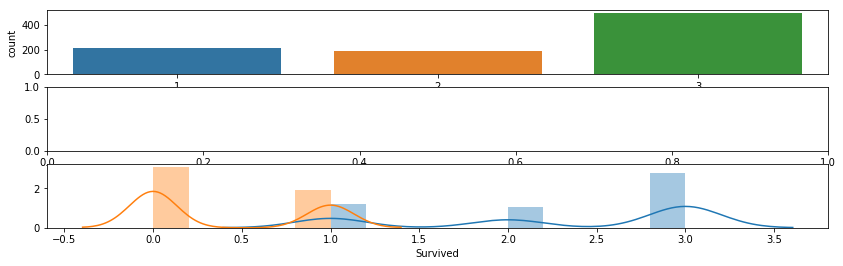

In [386]:
fig,ax = plt.subplots(3,1,figsize = (14,4))
sns.countplot(train["Pclass"],ax = ax[0])
ax[1] = sns.distplot(train["Pclass"])
ax[2] = sns.distplot(train["Survived"])

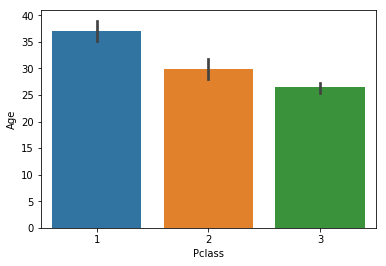

In [385]:
sns.barplot(train["Pclass"], train["Age"])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


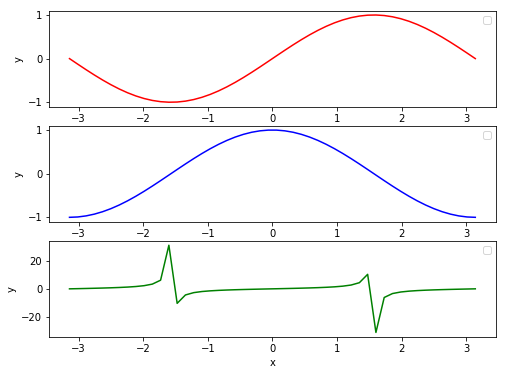

In [375]:
x = np.linspace(-1*np.pi,np.pi)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

fig,ax = plt.subplots(3,1, figsize = (8,6))
ax[0].plot(x,y1, color = "red")
ax[1].plot(x,y2, color = "blue")
ax[2].plot(x,y3, color = "green")
for i in range(3):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend()

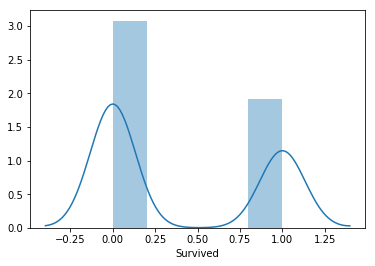

In [365]:
sns.distplot(train["Survived"])

In [42]:
train.loc[:"Age"].fillna('欠損値',axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,欠損値,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,欠損値,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,欠損値,S
5,6,0,3,"Moran, Mr. James",male,欠損値,0,0,330877,8.4583,欠損値,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,欠損値,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,欠損値,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,欠損値,C


In [45]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

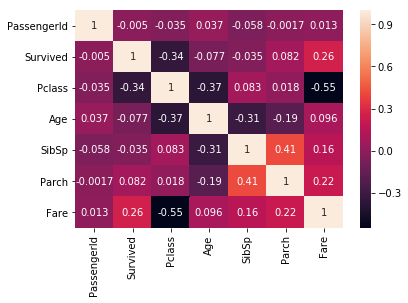

In [48]:
sns.heatmap(train.corr(),annot = True)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

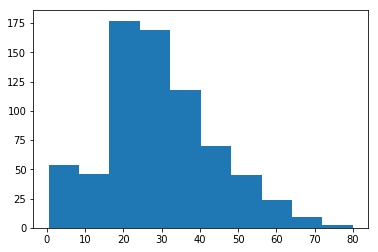

In [44]:
#ヒストグラムで分布確認
plt.hist(train["Age"])

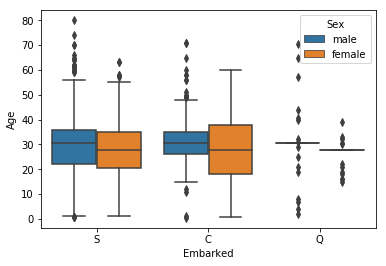

In [393]:
#ヒストグラムで分布確認
sns.boxplot(train["Embarked"],train["Age"],hue=train.Sex)

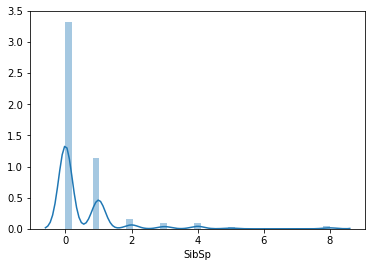

In [27]:
#ヒストグラムで分布確認
sns.distplot(train["SibSp"])

In [291]:

import pandas as pd
import numpy as np
url=("https://weather.time-j.net/Stations/JP/sendai")
df=pd.read_html(url)
df

[  Unnamed: 0    1月    2月    3月    4月     5月     6月     7月     8月     9月  \
 0  最高気温( °C)   5.3   5.9   9.2  15.0   19.4   22.3   25.7   27.9   24.4   
 1  平均気温( °C)   1.6   2.0   4.9  10.3   15.0   18.5   22.2   24.2   20.7   
 2  最低気温( °C)  -1.7  -1.5   0.9   6.1   11.1   15.5   19.5   21.4   17.6   
 3    降水量(mm)  37.0  38.4  68.2  97.6  109.9  145.6  179.4  166.9  187.5   
 
      10月   11月   12月       年  
 0   19.4  13.7   8.4    16.4  
 1   15.2   9.4   4.5    12.4  
 2   11.2   5.2   0.9     8.9  
 3  122.0  65.1  36.6  1254.1  ]

In [ ]:
a = pd.pivot(train,index=[])